# IMPORT LIBRARY

In [2]:
#Library
import pandas as pd
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# DATA COLLECTING

In [34]:
# Baca File
df = pd.read_csv("dataset/Emotion_final.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


# DATA PREPROCESSING

In [ ]:
#Encode
#import fungsi label encoder dari sklearn
from sklearn.preprocessing import LabelEncoder

cat = pd.get_dummies(df.Emotion)
df = pd.concat([df,cat], axis=1)
df = df.drop(columns='Emotion')

In [12]:
df

,Text,anger,fear,happy,love,sadness,surprise
0,i didnt feel humiliated,0,0,0,0,1,0
1,i can go from feeling so hopeless to so damned...,0,0,0,0,1,0
2,im grabbing a minute to post i feel greedy wrong,1,0,0,0,0,0
3,i am ever feeling nostalgic about the fireplac...,0,0,0,1,0,0
4,i am feeling grouchy,1,0,0,0,0,0
...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,0,1,0,0,0,0
21455,Successive state elections have seen the gover...,0,1,0,0,0,0
21456,Vincent was irritated but not dismay,0,1,0,0,0,0
21457,Kendall-Hume turned back to face the dismayed ...,0,1,0,0,0,0


# DATA PREPROCESSING

In [16]:

#Deklarasi variabel mengambil atribut
X = df['Text'].values
Y = df[['happy', 'sadness', 'anger', 'fear', 'love', 'surprise']].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [18]:
# # Preprocessing Train Test Split
# training_size = 15000

# # Split Data Kalimat
# train_sentences = sentences[:training_size]
# test_sentences = sentences[training_size:]

# #Split Data Label
# train_labels = labels[:training_size]
# test_labels = labels[training_size:]

In [39]:
#Tokenisasi
tokenizer = Tokenizer(num_words=10000, oov_token="")

In [20]:
# Menghasilkan Kalimat ke dalam kamus
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)
word_index = tokenizer.word_index

In [21]:
# Menghasilkan Sequences dan padding pada data Train
train_seq = tokenizer.texts_to_sequences(X_train)
train_pad = pad_sequences(train_seq,maxlen=200, padding='post',truncating='post')

# Menghasilkan Sequences dan padding pada data Test
test_seq = tokenizer.texts_to_sequences(X_test)
test_pad = pad_sequences(test_seq,maxlen=200, padding='post',truncating='post')

# DATA MODELLING

In [23]:
# Modelling LSTM
model_lstm = tf.keras.Sequential([
    # Input Layer
    tf.keras.layers.Embedding(10000, 32, input_length=200),
    
    # Hidden Layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(48, activation='relu'),
    
    # Output Layer
    tf.keras.layers.Dense(6, activation='softmax')
])

In [33]:
#Epochs
model_lstm.compile('adam', 'categorical_crossentropy', ['accuracy'])
hasil = model_lstm.fit(train_pad, y_train, 
                       epochs=10,
                       validation_data=(test_pad, y_test))

Epoch 1/10
537/537 [==============================] - 50s 90ms/step - loss: 0.1127 - accuracy: 0.9609 - val_loss: 0.3558 - val_accuracy: 0.8919
Epoch 2/10
537/537 [==============================] - 57s 106ms/step - loss: 0.0797 - accuracy: 0.9729 - val_loss: 0.3917 - val_accuracy: 0.8898
Epoch 3/10
537/537 [==============================] - 54s 100ms/step - loss: 0.0637 - accuracy: 0.9778 - val_loss: 0.3691 - val_accuracy: 0.8954
Epoch 4/10
537/537 [==============================] - 54s 101ms/step - loss: 0.0589 - accuracy: 0.9804 - val_loss: 0.3994 - val_accuracy: 0.8896
Epoch 5/10
537/537 [==============================] - 55s 103ms/step - loss: 0.0505 - accuracy: 0.9820 - val_loss: 0.4926 - val_accuracy: 0.8861
Epoch 6/10
537/537 [==============================] - 53s 99ms/step - loss: 0.0501 - accuracy: 0.9829 - val_loss: 0.4170 - val_accuracy: 0.8926
Epoch 7/10
537/537 [==============================] - 52s 97ms/step - loss: 0.0409 - accuracy: 0.9853 - val_loss: 0.4616 - val_accur

In [27]:
#memasukkan data agar bisa di evaluasi akurasi
y_pred = (model_lstm.predict(test_pad > 0.5)).astype("int32")

135/135 [==============================] - 5s 29ms/step


In [28]:
print("Evaluate on test data")
results = model_lstm.evaluate(test_pad, y_test, batch_size=128)
print("validation loss, validation acc:", results)

Evaluate on test data
34/34 [==============================] - 3s 80ms/step - loss: 0.3288 - accuracy: 0.8912
validation loss, validation acc: [0.32877740263938904, 0.8911929130554199]


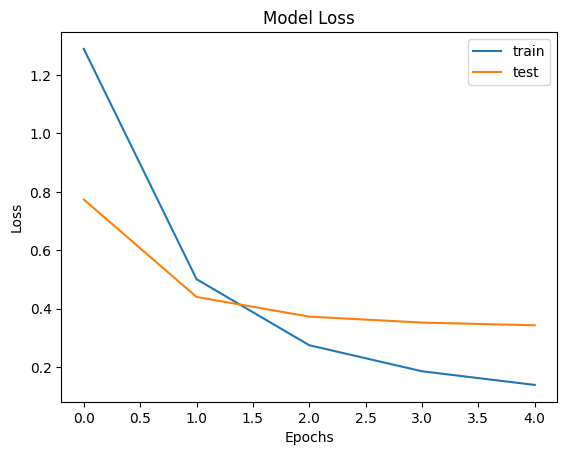

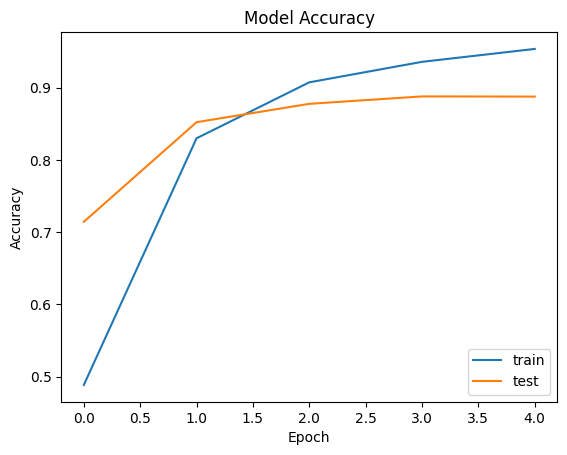

In [147]:

plt.plot(hasil.history['loss'])
plt.plot(hasil.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

plt.plot(hasil.history['accuracy'])
plt.plot(hasil.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# MODEL SAVING

In [ ]:
model_lstm.save("./model/model_finished.h5")


# VISUALISASI DATA

In [164]:
import seaborn as sns

In [165]:
df.head(5)

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


<AxesSubplot: xlabel='Emotion', ylabel='count'>

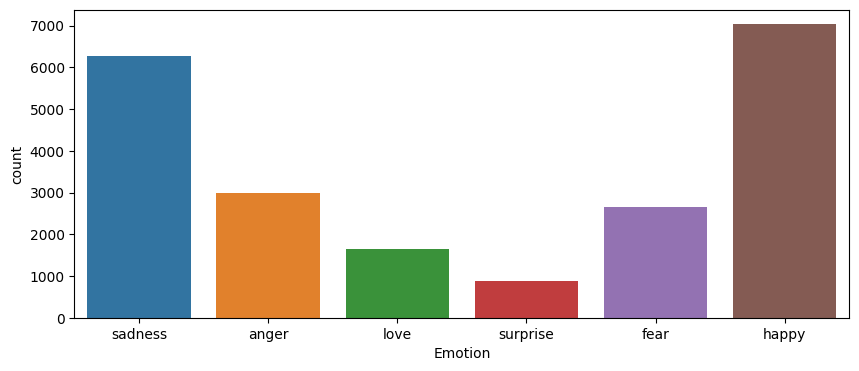

In [166]:
plt.figure(figsize=(10,4))
sns.countplot(x="Emotion", data=df)

In [167]:
print(df.groupby('Emotion').size())

Emotion
anger       2993
fear        2652
happy       7029
love        1641
sadness     6265
surprise     879
dtype: int64


Text(0.5, 1.0, 'Distribution Of Emotion')

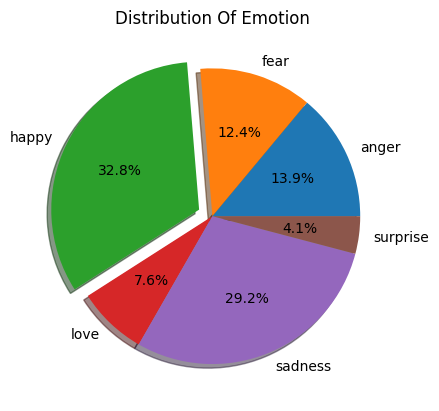

In [168]:
df.groupby('Emotion').size().plot(kind = 'pie', autopct='%1.1f%%',explode = (0, 0, 0.1, 0, 0, 0),shadow=True)
plt.title('Distribution Of Emotion')